# The Builder DP & the Chain Of Responsibility DP #
### ... and concluding remarks to the 'taught component' of Design Patterns ###

### Richard Mather ###

### November, 2021 ###

## Builder is a 'Creational' DP and 'Chain' is a 'Behavioural DP' ##

## Both Builder and chain-of-Responsibility have object-level scope ##

## There is no special relationship between these two patterns apart from the fact they are frequently implemented ##

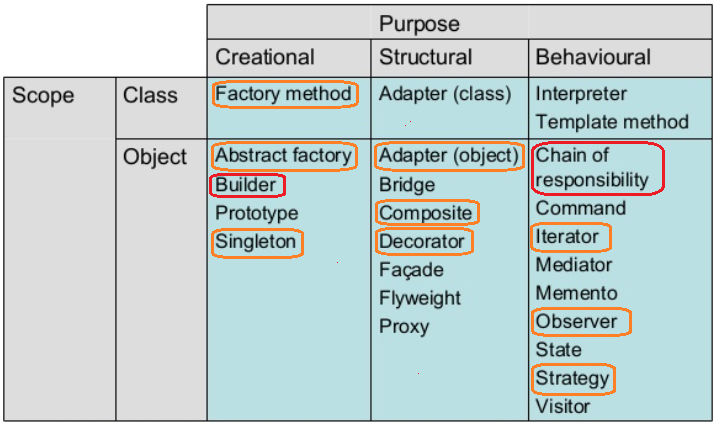

## At the end of this unit there are <font color="red">the final two logbook exercises for you to complete</font>  ##


## The Builder Design Pattern ##
### An object scope creational pattern ###

### Intent: ### 
"Separate the construction of a complex object from its representation so that the same construction process can create different representations" (Gamma et al., 1995) 
- The GoF use an example of a Rich Text Format (RTF) document formatter that should be able to convert to many formats (e.g. ASCII text, TEXText, various proprietary word processor formats, a text widget etc)
- However, the structure should be easily extendable to accomodate new formats (e.g. PDF)
- According to the GoF, the proposed pattern comprises:
 - ***Product*** - the complex object under creation - ASCII text etc. or (in the example below) a 'matplotlib' graph
 - ***ConcreteBuilder*** - the constructor for the product that knows the entities needed and assembles the components
 - ***Builder*** - specifies an abstract interface for creating the Product object
 - ***Director*** - constructs an object using the Builder interface
- The GoF describe the collaborations/messaging between Builder components as follows:
 - The ***client*** therefore only has to create a ***Director*** object and configure it with the desired ***Builder*** object
 - The ***Director*** notifies the ***builder*** whenever a part needs to be assembled
 - The ***builder*** handles requests from the ***director*** and adds parts to the ***product***
 - The ***client*** retrieves the ***product*** from the ***builder***
 

### Structure ###

This is the generalised structure for Builder as presented in Gamma et al. (1995)

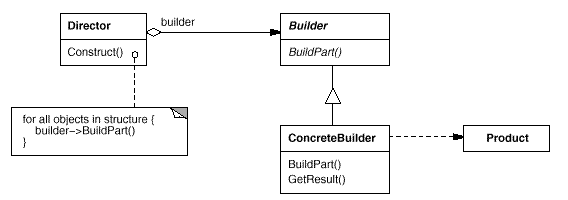

### Consequences ###

The GoF maintain that these are mainly beneficial ...
- ***Provides capacity for varying a product's internal representation*** - because products are constructed through an abstract interface
- ***Separates concerns for construction and representation***, the ConcreteBuilder is written once and different directors reuse this to build product variants that have the ***same*** set of parts
- ***Can be subclassed***, for example, if an application requires an extended version at run time
- ***Compared to other creational patterns, Builder provides greater control over the construction process*** ... other patterns tend to create return objects in a single step without control over the construction process.

### Implementation ###

- The following takes a concise example from Ryoo (2015), originally to simulate assembling a car, and extends this to assembling components of ***matplotlib*** and ***numpy*** objects required to draw plots of functions
- The fourth and final plot (constructed by the ConcreteBuilder 'AnotherPlotBuilder') demonstrates that the design is sufficiently extendable to accomodate plot products comprised of additional components.


Plot Title: Graphical Representation of Sine Function 

Data Points: [-6.  -5.5 -5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5
  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5]


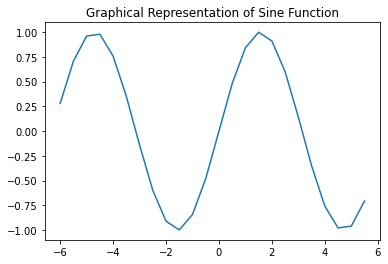

Plot Title: Graphical Representation of Cosine Function 

Data Points: [-4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5
  3.   3.5]


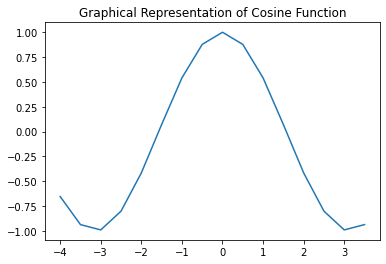

Plot Title: Graphical Representation of Tangent Function 

Data Points: [-4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5
  3.   3.5]


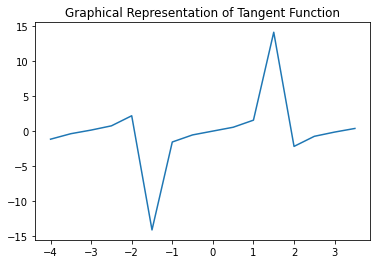

Plot Title: Graphical Representation of Another Function 

Data Points: [0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4
 3.6 3.8 4.  4.2 4.4 4.6 4.8]


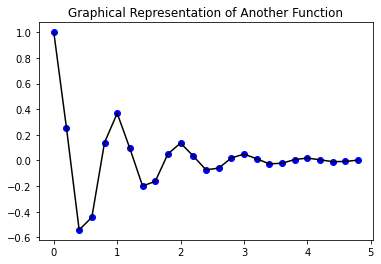

In [1]:
# Example adapted and extended from Ryoo (2015), matplotlib (https://matplotlib.org/xkcd/users/pyplot_tutorial.html) 
# ... and https://python-patterns.guide/gang-of-four/builder/

import numpy as np
import matplotlib.pyplot as plt

class Director():
    """Director"""
    def __init__(self, builder):
        self._builder = builder 
        
    def construct_plot(self):
        self._builder.create_new_plot()
        self._builder.add_title()
        self._builder.add_dataRange()
        self._builder.add_plotType()

        return self._builder.plot
        

class Builder():
    """Abstract Builder"""
    def __init__(self):
        self.plot = None 
        
    def create_new_plot(self):
        self.plot = Plot()
        

class SinePlotBuilder(Builder):
    """Concrete Builder --> provides parts and tools to work on the parts """
    
    def add_title(self):
        self.plot.title = "Graphical Representation of Sine Function"

    def add_dataRange(self):
        self.plot.dataRange = np.arange(-6, 6, 0.5)

    def add_plotType(self):    
        plt.plot(self.plot.dataRange, np.sin(self.plot.dataRange))
        plt.title(self.plot.title)
        

class CosinePlotBuilder(Builder):
    """Concrete Builder --> provides parts and tools to work on the parts """
    
    def add_title(self):
        self.plot.title = "Graphical Representation of Cosine Function"

    def add_dataRange(self):
        self.plot.dataRange = np.arange(-4, 4, 0.5)

    def add_plotType(self):    
        plt.plot(self.plot.dataRange, np.cos(self.plot.dataRange))
        plt.title(self.plot.title)

        
class TangentPlotBuilder(Builder):
    """Concrete Builder --> provides parts and tools to work on the parts """
    
    def add_title(self):
        self.plot.title = "Graphical Representation of Tangent Function"

    def add_dataRange(self):
        self.plot.dataRange = np.arange(-4, 4, 0.5)

    def add_plotType(self):
        plt.plot(self.plot.dataRange, np.tan(self.plot.dataRange))
        plt.title(self.plot.title)
        

class AnotherPlotBuilder(Builder):
    """Concrete Builder --> provides parts and tools to work on the parts """

    def add_title(self):
        self.plot.title = "Graphical Representation of Another Function"

    def add_dataRange(self):
        self.plot.dataRange = np.arange(0.0, 5.0, 0.2)

    def add_plotType(self):
        def f(t):
            return np.exp(-t) * np.cos(2*np.pi*t)
        self.plotType = plt.plot(self.plot.dataRange, f(self.plot.dataRange), 'bo', self.plot.dataRange, f(self.plot.dataRange), 'k')
        plt.title(self.plot.title)

        
class Plot():
    """Product"""
    def __init__(self):
        self.title = None
        self.dataRange = None
        self.plotType = None
        
    def __str__(self):
        return 'Plot Title: {} \n\nData Points: {}'.format(self.title, self.dataRange)
    
    def doPlot(self):
        plt.show()

# UPDATED 22/4/21 FOR POLYMORPHIC CALL TO ALL BUILDERS TO BUILD THEIR PLOT OBJECTS
#List to store plot builder objects
objects = []

# Create and append a sine plot builder
builder = SinePlotBuilder()
objects.append(builder)

# Create and append a cosine plot builder
builder = CosinePlotBuilder()
objects.append(builder)

# Create and append a tangent plot builder
builder = TangentPlotBuilder()
objects.append(builder)

# Create and append aanother plot builder
builder = AnotherPlotBuilder()
objects.append(builder)

print("===============================")

# POLYMORPHIC TREATMENT OF PLOT BUILDERS
for obj in objects:
    director = Director(obj)
    plot = director.construct_plot()
    print(plot)
    plot.doPlot()
    
    

## The Chain-of-Responsibility Design Pattern ##
### An object scope structural pattern ###

### Intent: ### 
"Avoid coupling the sender of a request to its receiver by giving more than one object a chance to handle the request. Chain the receiving objects and pass the request along the chain until an object handles it" (Gamma et al., 1995) 
- The GoF suggest the case of objects that provide help to users for a hierarchy of widgets and applications (e.g. a print button, a print dialog, the containing application etc.) for which multiple chained objects have a chance to handle the request.

- A common example is an object tree ... e.g. "when a user clicks a button, the event propagates through the chain of GUI elements that starts with the button, goes along its containers (like forms or panels), and ends up with the main application window. The event is processed by the first element in the chain that’s capable of handling it" (Alexander Shivets, https://refactoring.guru/design-patterns/chain-of-responsibility)

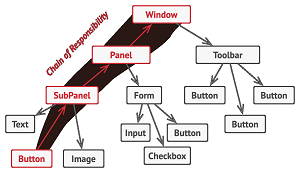

- The components are:
 - the ***Handler*** which defines the interface for handling requests
 - the ***ConcreteHandler*** which will either handle the request it is responsible for or pass it on to the next handler in the chain
 - the ***Client*** which initiates the request

### Structure ###

This is the generalised structure for Chain of Responsibility as presented in Gamma et al. (1995)

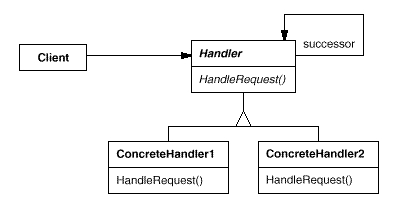


### Consequences ###

The good are ...
- ***Reduced coupling*** - client objects do not 'need to know' which object is responsible for handling a request
- ***Flexible and extendable*** - relatively simple to add or change responsibilities for handling requests

Less good is ...
- ***Receipt is not guaranteed*** - as there is no explicit request receiver a request may fall off the end of a chain without being handled

### Implementation ###

- The example below (extended with more 'handlers' and originally from Ryoo (2015) ) is a concise illustration that maps to 'Chain-of-Responsibility' entities expressed in the original GoF structure 

In [10]:
# Simple Example of Chain-of-Responsibility 
# ... extended with two more handlers to illustrate the CHAIN
# ... from Ryoo (2015)


class Handler: #Abstract handler
    """Abstract Handler"""
    def __init__(self, successor):
        self._successor = successor # Define who is the next handler

    def handle(self, request):
            handled = self._handle(request) #If handled, stop here

            #Otherwise, keep going
            if not handled:
                self._successor.handle(request)    

    def _handle(self, request):
        raise NotImplementedError('Must provide implementation in subclass!')

class ConcreteHandler1(Handler): # Inherits from the abstract handler
    """Concrete handler 1"""
    def _handle(self, request):
        if 0 < request <= 10: # Provide a condition for handling
            print("Request {} handled in handler 1".format(request))
            return True # Indicates that the request has been handled
        
class ConcreteHandler2(Handler): # Inherits from the abstract handler
    """Concrete handler 2"""
    def _handle(self, request):
        if 0 < request <= 20: # Provide a condition for handling
            print("Request {} handled in handler 2".format(request))
            return True # Indicates that the request has been handled

class ConcreteHandler3(Handler): # Inherits from the abstract handler
    """Concrete handler 3"""
    def _handle(self, request):
        if 0 < request <= 30: # Provide a condition for handling
            print("Request {} handled in handler 3".format(request))
            return True # Indicates that the request has been handled
        
class DefaultHandler(Handler): # Inherits from the abstract handler
    """Default handler"""

    def _handle(self, request):
        """If there is no handler available"""
        #No condition checking since this is a default handler
        print("End of chain, no handler for {}".format(request))
        return True # Indicates that the request has been handled

class Client: # Using handlers
    def __init__(self):
        # Create handlers and use them in a sequence (CHAIN) you want - Note that the default handler has no successor
        self.handler = ConcreteHandler1(ConcreteHandler2(ConcreteHandler3(DefaultHandler(None)))) 

    def delegate(self, requests): # Send your requests one at a time for handlers to handle
        for request in requests:
                self.handler.handle(request)

# Create a client
c = Client()

# Create requests
requests = [2, 2.8, 5, -5, 12, 30, 40]

# Send the requests
c.delegate(requests)

Request 2 handled in handler 1
Request 2.8 handled in handler 1
Request 5 handled in handler 1
End of chain, no handler for -5
Request 12 handled in handler 2
Request 30 handled in handler 3
End of chain, no handler for 40


## <font color="red">Sumarising Design Patterns ... </font> ##

- Design Patterns are about doing OO well and really understanding encapsulation, polymorphism and abstraction
 - "*I think patterns as a whole can help people learn object-oriented thinking: how you can leverage polymorphism, design for composition, delegation, balance responsibilities, and provide pluggable behaviour. Patterns go beyond applying objects to some graphical shape example, with a shape class hierarchy and some polymorphic draw method. You really learn about polymorphism when you've understood the patterns. So patterns are good for learning OO and design in general*" (Gamma interview, 2005)

- Patterns are based on two principles of reusable OO design
 - ***Program to an 'interface', not an 'implementation (Gamma et al., 1995, p18)***
 - ***Favour 'object composition' over 'class inheritance' (Gamma et al., 1995, p20)***

- The philosophy of patterns is closely aligned to that of clarity, structure and readability for software engineering in general
 - in Python if you do ```import this``` you will get 'the Zen of Python' this ...

```The Zen of Python, by Tim Peters
Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!
```

- Pattern implementations have some language dependency - e.g. Python often avoids formal interfacing, as it is dynamically typed and takes advantage of 'duck typing' - very nicely expressed by Google-Python engineer Alex Martelli (see http://www.aleax.it/gdd_pydp.pdf for a thought-provoking introduction to DPs)

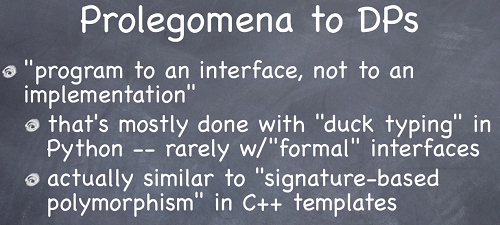

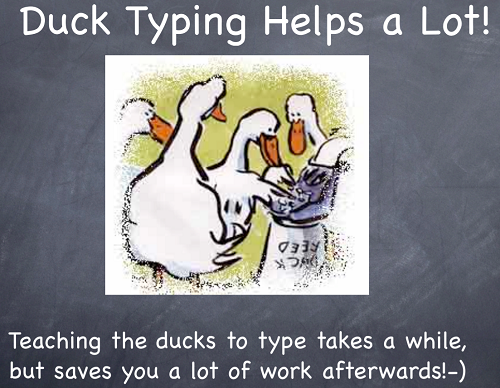

- Patterns require effort and it often helps to have different perspectives ...
 - These may be entertaining - e.g. James Dempsey(an Apple engineer) and his 'MVC Song' ... as well as informative (https://www.youtube.com/watch?v=YYvOGPMLVDo)
 - Or concise and insightful ... see the aforementioned presentation by Alex Martelli  


In [6]:
import this


The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


## <font color="red">Logbook Exercises 16 and 17</font> ##

- PLEASE NOTE THE CHANGE TO YOUR ASSIGNMENT BRIEF - for the third and final part of your assignment (copied below) that it is now only necessary to write about <font color="red">TWO</font> (not four) additional Design Patterns ...
  - *In you logbooks draw on a selection of Two Design Patterns, and document these using the following headings: 1 intent; 2 motivation; 3 structure (embed UML diagrams if applicable); 4 implementation; 5 sample code (your working example); 6 evaluation – raise any key points concerning programming language idioms, consequences of using the pattern, examples of appropriate uses with respect to application, architecture and implementation requirements* [40 marks]

 - Clearly it will be necessary to insert both markdown and code cells. 
 - Please make sure that all cells are properly titled with the excercise they represent 
 - Use and embed any screen capture that supports your assignment responses

- Suitable task subjects include:
 - Demonstrating a new pattern (one which we haven't encountered)
 - Presenting a pattern that we have addressed in a new/alternative/re-engineered format
 - Converting a pattern to another programming language
 - Identifying patterns in well known frameworks (e.g. for Python web development you might examine Django, Flask and/or Jinja2)


###### References & Learning Resources#

- Alex Martelli (various versions) Design Patterns in Python. Avaialable at: http://www.aleax.it/gdd_pydp.pdf
- Bruce Eckel & Friends (undated) Python 3 Patterns, Recipes and Idioms. Available at: Python 3 Patterns, Recipes and Idioms 
- Driscoll, M. (2017) "Python 101" (https://python101.pythonlibrary.org/chapter25_decorators.html)
- Gamma, E., Helm, R., Johnson, R., & Vlissides, J. (1995). Gamma, E., Helm, R., Johnson, R., & Vlissides, J. Mar. 1995. Design Patterns–Elements of Reusable Object-Oriented Software. Addison-Wesley.
- James Dempsey(2003) The 'MVC Song'
- Jungwoo Ryoo (2015) Python: Design Patterns. Available at: https://www.linkedin.com/learning/python-design-patterns and https://www.lynda.com/Python-tutorials/Design-Patterns-Python/369187-2.html
- Phillips D. (2015) Python 3 Object-oriented Programming - Second Edition. PACKT Publishing.
- Shalloway, A., & Trott, J. R. (2002). Design patterns explained: A new perspective on object-oriented design. Addison-Wesley